In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

### Load Data

In [3]:
df=pd.read_csv(r"C:\Users\rasik\Downloads\beneficiary_credit_data_with_cbsc.csv")
df.head()

,beneficiary_id,loan_amount,tenure,repayments_on_time_ratio,num_past_loans,outstanding_amount,avg_monthly_kwh,mobile_recharge_avg,utility_bill_on_time_ratio,business_sector,default,CBSC
0,B1,20795,24,0.86,2,19894,239,275,0.48,transport,0,69.118946
1,B2,5860,36,0.90,5,202,88,121,0.71,services,0,81.426943
2,B3,43158,36,0.80,0,11447,178,337,0.93,transport,1,89.368066
3,B4,49732,12,0.96,3,12688,226,257,0.84,retail,0,93.785495
4,B5,16284,36,0.83,4,4389,127,137,0.82,manufacturing,0,78.481362


### Explore Data

In [4]:
df.describe()

,loan_amount,tenure,repayments_on_time_ratio,num_past_loans,outstanding_amount,avg_monthly_kwh,mobile_recharge_avg,utility_bill_on_time_ratio,default,CBSC
count,50.000000,50.000000,50.000000,50.0000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25013.020000,23.280000,0.763200,2.2400,10049.56000,203.980000,252.220000,0.704600,0.460000,73.531033
std,14979.559107,9.516988,0.135864,1.8357,6025.37712,52.118581,93.586867,0.165914,0.503457,19.046211
min,5189.000000,12.000000,0.520000,0.0000,197.00000,88.000000,103.000000,0.420000,0.000000,0.000000
25%,11297.750000,12.000000,0.642500,0.2500,4907.75000,173.500000,154.000000,0.582500,0.000000,67.463383
50%,22999.500000,24.000000,0.780000,2.0000,10225.00000,212.000000,258.500000,0.715000,0.000000,76.574034
75%,39717.500000,36.000000,0.860000,4.0000,14563.25000,239.750000,331.250000,0.840000,1.000000,85.789496
max,49732.000000,36.000000,0.990000,5.0000,19894.00000,296.000000,387.000000,0.990000,1.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   beneficiary_id              50 non-null     object 
 1   loan_amount                 50 non-null     int64  
 2   tenure                      50 non-null     int64  
 3   repayments_on_time_ratio    50 non-null     float64
 4   num_past_loans              50 non-null     int64  
 5   outstanding_amount          50 non-null     int64  
 6   avg_monthly_kwh             50 non-null     int64  
 7   mobile_recharge_avg         50 non-null     int64  
 8   utility_bill_on_time_ratio  50 non-null     float64
 9   business_sector             50 non-null     object 
 10  default                     50 non-null     int64  
 11  CBSC                        50 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 4.8+ KB


### Dummy Encoding

In [6]:
df.drop(columns=["beneficiary_id"], inplace=True,axis=1)
df=pd.get_dummies(df,drop_first=True)
df.head()

,loan_amount,tenure,repayments_on_time_ratio,num_past_loans,outstanding_amount,avg_monthly_kwh,mobile_recharge_avg,utility_bill_on_time_ratio,default,CBSC,business_sector_manufacturing,business_sector_retail,business_sector_services,business_sector_transport
0,20795,24,0.86,2,19894,239,275,0.48,0,69.118946,False,False,False,True
1,5860,36,0.90,5,202,88,121,0.71,0,81.426943,False,False,True,False
2,43158,36,0.80,0,11447,178,337,0.93,1,89.368066,False,False,False,True
3,49732,12,0.96,3,12688,226,257,0.84,0,93.785495,False,True,False,False
4,16284,36,0.83,4,4389,127,137,0.82,0,78.481362,True,False,False,False


### Data Analysis

<Axes: >

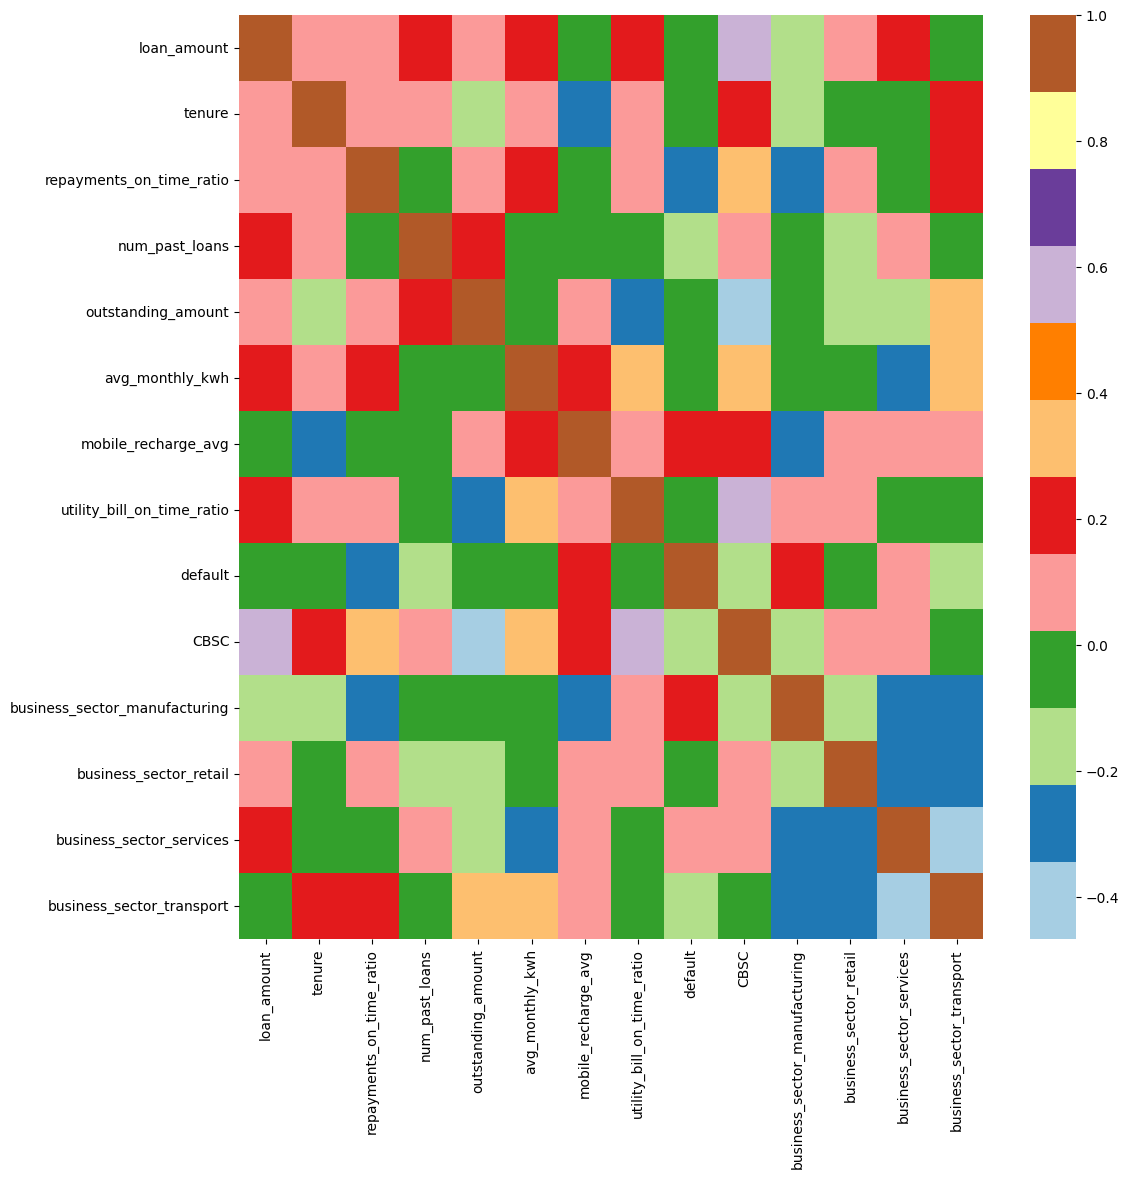

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")

### Train-Test Split

In [8]:
X=df.drop(['CBSC'], axis=1)
y=df.CBSC.values
faetures_names=X.columns

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20)

### Feature Scaling

In [10]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Model building and testing

In [11]:
# Initiating the classfier
model_xgb=XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
# Passing the data to classifier
model_xgb.fit(X_train, y_train)
# predictions
y_pred_xgb=model_xgb.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))

RMSE: 281.82499657531656
R² Score: -0.636935213186308


In [12]:
test_record = {
    "beneficiary_id": "B31",
    "loan_amount": 35000,
    "tenure": 18,
    "repayments_on_time_ratio": 0.92,   
    "num_past_loans": 1,
    "outstanding_amount": 5000,
    "avg_monthly_kwh": 180,             
    "mobile_recharge_avg": 320,         
    "utility_bill_on_time_ratio": 0.88, 
    "business_sector": "retail",
    "default": 0,                       
}
test_df = pd.DataFrame([test_record])
X_test_record = test_df.drop(["beneficiary_id"], axis=1)

X_test_record=pd.get_dummies(X_test_record,drop_first=True)
X_test_record = X_test_record.reindex(columns=X.columns, fill_value=0)
# Apply same scaling
test_scaled = sc.transform(X_test_record)

# Predict CBSC
predicted_cbsc = model_xgb.predict(test_scaled)
print("Predicted CBSC:", predicted_cbsc[0])

Predicted CBSC: 91.00744


### Save Modals and Scaler

In [14]:
import joblib

# Save trained model
joblib.dump(model_xgb, "credit_model.pkl")

# Save the StandardScaler
joblib.dump(sc, "scaler.pkl")

# Save feature names (important for encoding test records)
joblib.dump(X.columns, "feature_names.pkl")


['feature_names.pkl']

- The model can be further improved by doing Feature Engineering and Hyper Parameter Optimization